In [1]:
import numpy, pandas, os, skimage
import matplotlib.pyplot as plt
from skimage import io
from skimage import data
from sklearn import svm
from skimage.transform import resize
from IPython.display import display

In [3]:
train = pandas.read_csv('Kaggle_Data/train.csv', header=0).sort_values(['species','id']) #Load the training data
test = pandas.read_csv('Kaggle_Data/test.csv', header=0) #Load the testing data

In [4]:
numTrain = len(train['id'])
numTest = len(test['id'])
numPics = numTrain + numTest
pic_id = numpy.empty(numPics, dtype=object)   #Empty array of length numPics
pic_id[:numTrain] = train['id'] #Copy Train's ids to the front
pic_id[numTrain:] = test['id'] #Copy Test's ids to the end

In [5]:
#NOTE: The images have Average Width = 693.3 and Average Height = 493.1

pics = numpy.array([ numpy.array(io.imread('Kaggle_Data/images/%d.jpg' % (pic_id[i]))) for i in range(numPics) ]) #Load each image into a 2D array

pics_resized = numpy.array([ numpy.array(skimage.transform.resize(pics[i],(100,100))) for i in range(numPics) ])  #Resize each image

pics_resized_flat = numpy.array([ pics_resized[i].flatten() for i in range(numPics) ])  #Flatten each image into a 1D array

#NOTE: From here on out, it's best to pretend that the ids of the training (resp. testing) images had been 0, ..., numTrain - 1 (resp. numTrain, ..., numPics - 1) all along.

In [6]:
clf = svm.SVC(gamma = 0.001, C = 100.0)
clf.fit( pics_resized_flat[:numTrain], range(numTrain) )

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
species = numpy.empty(numPics, dtype=object) #Create an empty array of length numPics
species[:numTrain] = train['species'] #Copy Train's species to the first numTrain elements of this array

#For each test leaf, get the index of training leaf that is closest to this test leaf. 
closest_train_ind = clf.predict(pics_resized_flat[numTrain:])
for i in range(numTrain,numPics):
    #Note that for each i, closest_train_ind[i-numTrain] is an integer in range(0:numTrain)
    species[i] = species[closest_train_ind[i-numTrain]]

'The leaf indexed by 0, pictured below, is of the species Acer_Capillipes.'

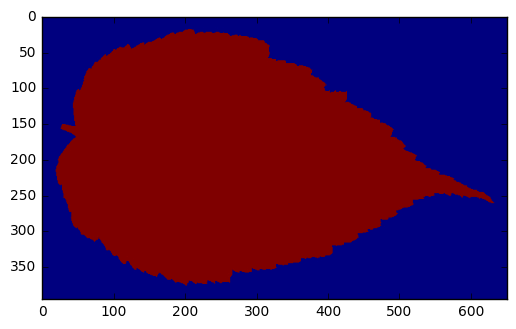

'Below are all the TEST leaves of the species Acer_Capillipes:'

'index i = 1204,  picture id = 549'

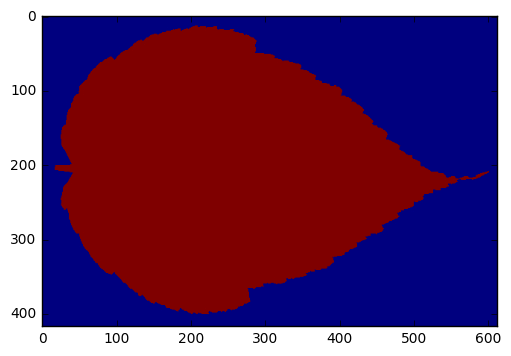

'index i = 1227,  picture id = 607'

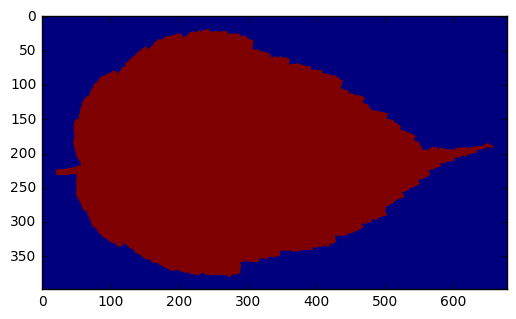

'index i = 1312,  picture id = 845'

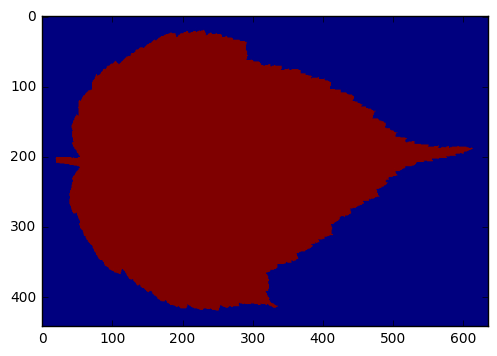

'index i = 1324,  picture id = 902'

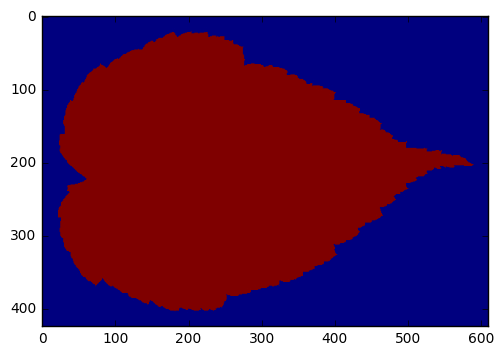

'index i = 1529,  picture id = 1430'

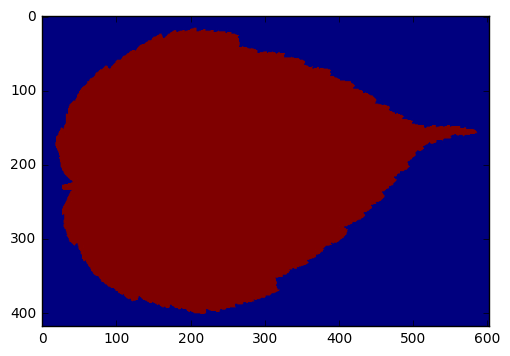

'index i = 1569,  picture id = 1540'

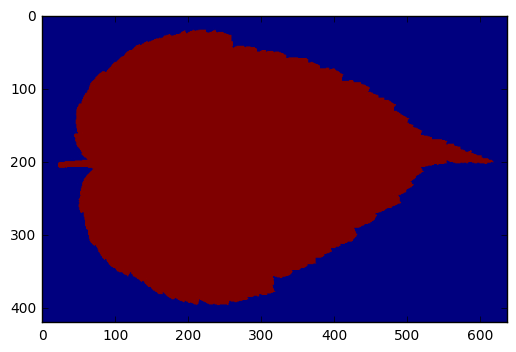

In [11]:
#Given myId, we now display all images of myId's species
myId = 0
myIdSpecies = species[myId]
display("The leaf indexed by %d, pictured below, is of the species %s." % (myId, myIdSpecies))
plt.imshow(pics[myId])
plt.show()

display('Below are all the TEST leaves of the species ' + myIdSpecies + ':')
for i in range(numPics):
    if i != myId and species[i] == myIdSpecies and i >= numTrain:
        display("index i = %d,  picture id = %d" % (i, pic_id[i]))
        plt.imshow(pics[i])
        plt.show()